In [21]:
# generic useful imports

import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)

from matplotlib import rc
rc('text', usetex=True)
# this is needed in order to have an easier time typing
# the labels for the plots
rc('text.latex', preamble=r'''\usepackage{amsmath}
          \usepackage{physics}
          \usepackage{siunitx}
          ''')

# progressbar
from tqdm import tqdm

We start by seeing the different integrators
of ODEs
in action: 
here is how the Euler method, the midpoint method and the 
Runge-Kutta 4th order method perform for the equation

$$
\frac{\mathrm{d} x}{\mathrm{d}t} = - x^3 + \sin(t)
\,,
$$

integrated from $t=0$ to $t=100$ with timesteps of $h_{\text{default}} = 0.4$. 

Fourth order RK: 100%|██████████| 250/250 [00:00<00:00, 51819.92it/s]


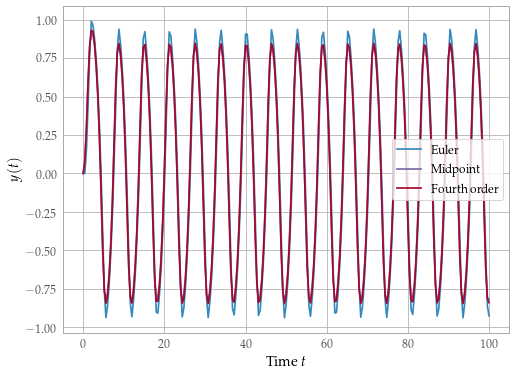

In [17]:
from diffeq_integrators import euler, midpoint, fourth_order, hdefault

ftest = lambda x, t: - x ** 3 + np.sin(t)
params = (0, 100, 0)

t, x_euler = euler(ftest, *params)
t, x_midpoint = midpoint(ftest, *params)
t, x_fourth_order = fourth_order(ftest, *params)
plt.plot(t, x_euler, label="Euler")
plt.plot(t, x_midpoint, label="Midpoint")
plt.plot(t, x_fourth_order, label="Fourth order")
plt.xlabel("Time $t$")
plt.ylabel("$y(t)$")
plt.legend()
plt.show()

This looks good, and one can kind of see that the midpoint and fourth order method perform better than the Euler one since they are higher order. 

However, to quantitatively affirm this we should plot the residuals from the actual analytical solution of the differential equation. 
We approximate the proper solution by using the RK fourth order method with timesteps 100 times smaller than $h_{\text{default}}$. 
The residuals are plotted with a symmetric logarithmic scale (see [here](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.yscale)), with a linear region in the interval from $-10^{-3}$ to $10^{-3}$.

This way, the advantage of the higher order methods is much clearer.

Fourth order RK: 100%|██████████| 25000/25000 [00:00<00:00, 94109.37it/s]


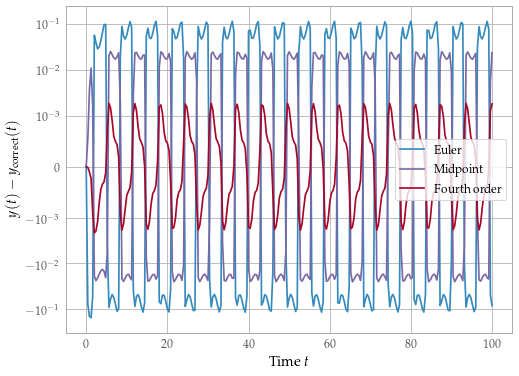

In [20]:
tc, x_correct = fourth_order(ftest, *params, h=hdefault / 100)
x_c = x_correct[::100]
x_e = x_euler - x_c
x_m = x_midpoint - x_c
x_f = x_fourth_order - x_c
plt.plot(t, x_e, label="Euler")
plt.plot(t, x_m, label="Midpoint")
plt.plot(t, x_f, label="Fourth order")
plt.xlabel("Time $t$")
plt.ylabel("$y(t) - y _{\\text{correct}} (t)$")
plt.legend()
plt.yscale('symlog', linthreshy=1e-3)
plt.show()

In [1]:
%%markdown

Now, the ODE integrators can be applied to generic functions: 
in order to solve differential equations of order higher than first it is sufficient to increase the dimensionality of the problem by defining velocity, acceleration etc.

For a problem such as the $N$-body one, we have a differential equation which looks like 
$$
\frac{\mathrm{d}^2 x}{\mathrm{d}t^2} = F(x)
\,,
$$
where $x$ is a vector of length $d \times N$, where $d$ is the number of dimensions in which our problem is to be treated. Generally we should have $d=3$ but we will treat a $d=2$, $N=2$ problem for simplicity. So, the equations look like: 
$$
\begin{cases}
\frac{\mathrm{d} x}{\mathrm{d} t} &= v \\
\frac{\mathrm{d} v}{\mathrm{d} t} &= F(x) 
\,.
\end{cases}
$$


Now, the ODE integrators can be applied to generic functions: 
in order to solve differential equations of order higher than first it is sufficient to increase the dimensionality of the problem by defining velocity, acceleration etc.

For a problem such as the $N$-body one, we have a differential equation which looks like 
$$
\frac{\mathrm{d}^2 x}{\mathrm{d}t^2} = F(x)
\,,
$$
where $x$ is a vector of length $d \times N$, where $d$ is the number of dimensions in which our problem is to be treated. Generally we should have $d=3$ but we will treat a $d=2$, $N=2$ problem for simplicity. So, the equations look like: 
$$
\begin{cases}
\frac{\mathrm{d} x}{\mathrm{d} t} &= v \\
\frac{\mathrm{d} v}{\mathrm{d} t} &= F(x) 
\,.
\end{cases}
$$


In [7]:
%%markdown
We would like to check whether the methods we are using for the solutions of ODEs are actually of the order they should be, that is, whether the error in the conservation of energy, momentum and such actually scales that way as we decrease the size of the timestep. 

So, we will integrate the two-body problem with the different methods, with a set of different timesteps, and plot error versus timestep in a log-log plot. We then expect to see powerlaws. 

We would like to check whether the methods we are using for the solutions of ODEs are actually of the order they should be, that is, whether the error in the conservation of energy, momentum and such actually scales that way as we decrease the size of the timestep. 

So, we will integrate the two-body problem with the different methods, with a set of different timesteps, and plot error versus timestep in a log-log plot. We then expect to see powerlaws. 
